In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.gaussian import IsotropicGauss
from mcjax.mcmc.rwm import Rwm
from mcjax.util.mcmc import ESS_geyer, normalized_autocorr



In [2]:
# initialize jax RNG
key = jr.key(0)

In [15]:
dim_arr = jnp.arange(1,31,1)
acc_rate_arr1 = []
acc_rate_arr2 = []
acc_rate_arr3 = []
for dim in dim_arr:
    # Target distribution
    mu = jnp.full(dim,1.)
    log_var = jnp.log(2)
    dist = IsotropicGauss(mu=mu,log_var=log_var)
    # random walk metropolis
    mcmc1 = Rwm(logtarget=dist, step_size=0.1/dim, cov=jnp.eye(dim))
    mcmc2 = Rwm(logtarget=dist, step_size=0.1/dim**2, cov=jnp.eye(dim))
    mcmc3 = Rwm(logtarget=dist, step_size=0.1, cov=jnp.eye(dim))
    
    # sample the trajectory with step size o(1/d)
    key, key_ = jr.split(key)
    x0 = jnp.zeros((dim,))
    n_steps = 1000_000
    state_init = mcmc1.init_state(x0)
    mcmc_output = mcmc1.run(key = key, n_samples=n_steps, state_init=state_init)
    acc_rate_arr1.append(mcmc_output["acceptance_rate"])
    

    # sample the trajectory with step size o(1/d^2)
    key, key_ = jr.split(key)
    x0 = jnp.zeros((dim,))
    n_steps = 1000_000
    state_init = mcmc2.init_state(x0)
    mcmc_output = mcmc2.run(key = key, n_samples=n_steps, state_init=state_init)
    acc_rate_arr2.append(mcmc_output["acceptance_rate"])

    # sample the trajectory with constant step size 
    key, key_ = jr.split(key)
    x0 = jnp.zeros((dim,))
    n_steps = 1000_000
    state_init = mcmc3.init_state(x0)
    mcmc_output = mcmc3.run(key = key, n_samples=n_steps, state_init=state_init)
    acc_rate_arr3.append(mcmc_output["acceptance_rate"])






Text(0.5, 1.0, 'Acceptance rate for different scaling schema of step size')

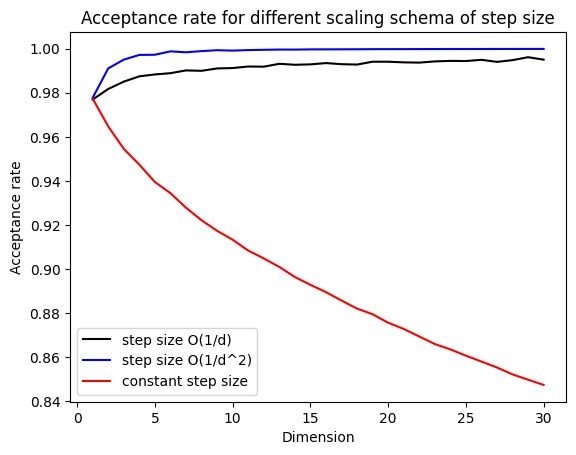

In [17]:
plt.plot(dim_arr,acc_rate_arr1,color = "black",label="step size O(1/d)")
plt.plot(dim_arr,acc_rate_arr2,color = "blue",label="step size O(1/d^2)")
plt.plot(dim_arr,acc_rate_arr3,color = "red",label="constant step size")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Acceptance rate")
plt.title("Acceptance rate for different scaling schema of step size")
